<!--NAVIGATION-->
< [Customizing Ticks](04.10-Customizing-Ticks.ipynb) | [Contents](Index.ipynb) | [Three-Dimensional Plotting in Matplotlib](04.12-Three-Dimensional-Plotting.ipynb) >

# Customizing Matplotlib: Configurations and Stylesheets

Matplotlib's default plot settings are often the subject of complaint among its users.
While much is slated to change in the 2.0 Matplotlib release in late 2016, the ability to customize default settings helps bring the package inline with your own aesthetic preferences.

Here we'll walk through some of Matplotlib's runtime configuration (rc) options, and take a look at the newer *stylesheets* feature, which contains some nice sets of default configurations.

## Plot Customization by Hand

Through this chapter, we've seen how it is possible to tweak individual plot settings to end up with something that looks a little bit nicer than the default.
It's possible to do these customizations for each individual plot.
For example, here is a fairly drab default histogram:

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np

%matplotlib inline

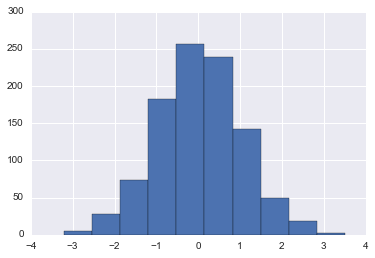

In [7]:
x = np.random.randn(1000)
plt.hist(x);

We can adjust this by hand to make it a much more visually pleasing plot:

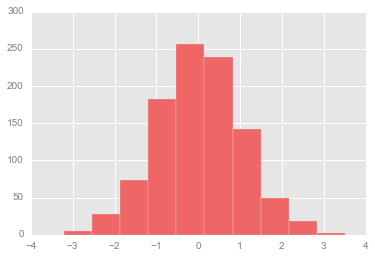

In [10]:
# use a gray background
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='in')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

## Changing the Defaults: ``rcParams``

Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create.
This configuration can be adjusted at any time using the ``plt.rc`` convenience routine.
Let's see what it looks like to modify the rc parameters so that our default plot will look similar to what we did before.

We'll start by saving a copy of the current ``rcParams`` dictionary, so we can easily reset these changes in the current session:

In [11]:
IPython_default = plt.rcParams.copy()

Now we can use the ``plt.rc`` function to change some of these settings:

In [12]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='in', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

With these settings defined, we can now create a plot and see our settings in action:

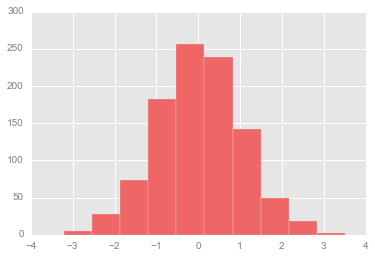

In [13]:
plt.hist(x);

Let's see what simple line plots look like with these rc parameters:

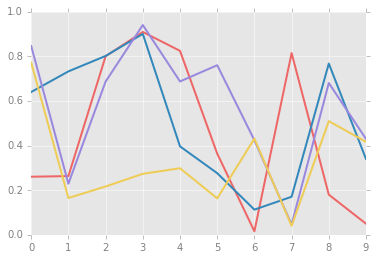

In [7]:
for i in range(4):
    plt.plot(np.random.rand(10))

## Stylesheets

``style`` module includes default stylesheets, plus ability to create and package your own styles. 

The available styles are listed in ``plt.style.available``:

In [8]:
plt.style.available[:5]

['fivethirtyeight',
 'seaborn-pastel',
 'seaborn-whitegrid',
 'ggplot',
 'grayscale']

To switch to a stylesheet:

``` python
plt.style.use('stylename')
```

To restrict style to specific plot(s), use the style context manager:

``` python
with plt.style.context('stylename'):
    make_a_plot()
```


In [14]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

### Default style

In [17]:
# reset rcParams
plt.rcParams.update(IPython_default);
plt.style.use('classic')

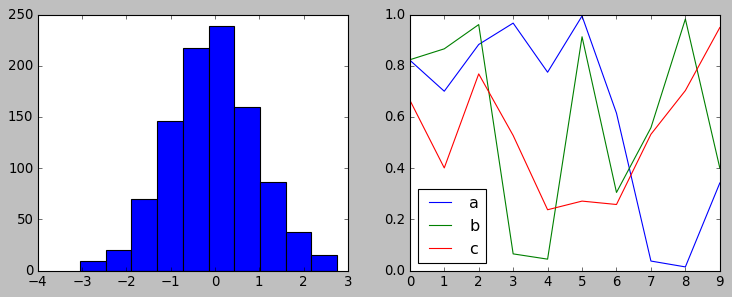

In [18]:
hist_and_lines()

### FiveThiryEight style

The ``fivethirtyeight`` style mimics the graphics of [FiveThirtyEight website](https://fivethirtyeight.com).
Bold colors, thick lines, and transparent axes.

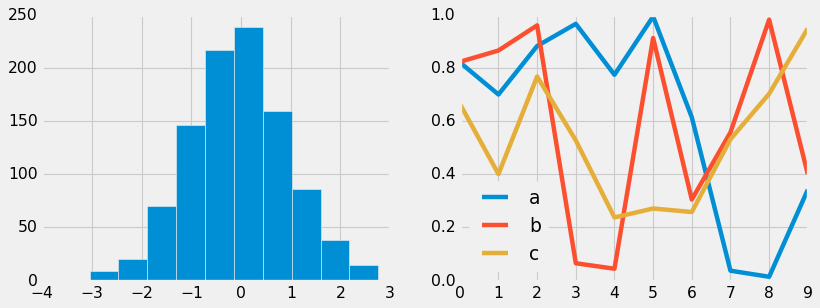

In [19]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot

Mimics the default styles of the ``ggplot`` package in the R language

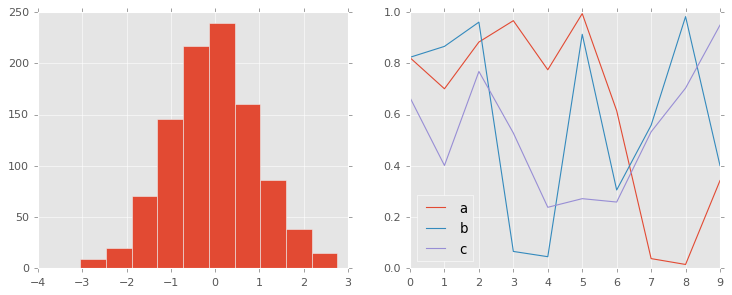

In [20]:
with plt.style.context('ggplot'):
    hist_and_lines()

### *Bayesian Methods for Hackers( style

There is a very nice short online book called [*Probabilistic Programming and Bayesian Methods for Hackers*](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/); it features figures created with Matplotlib, and uses a nice set of rc parameters to create a consistent and visually-appealing style throughout the book.
This style is reproduced in the ``bmh`` stylesheet:

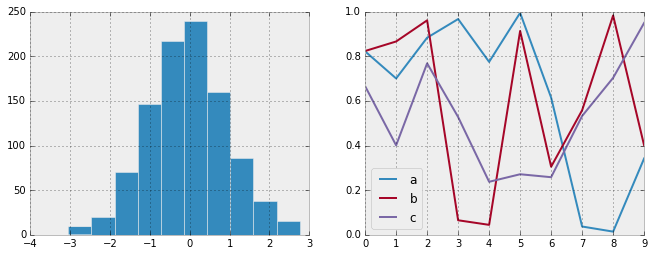

In [14]:
with plt.style.context('bmh'):
    hist_and_lines()

### Dark background

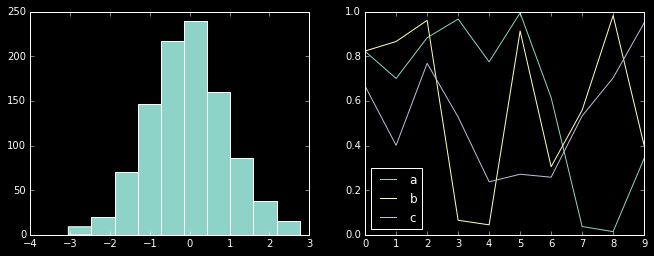

In [15]:
with plt.style.context('dark_background'):
    hist_and_lines()

### Grayscale

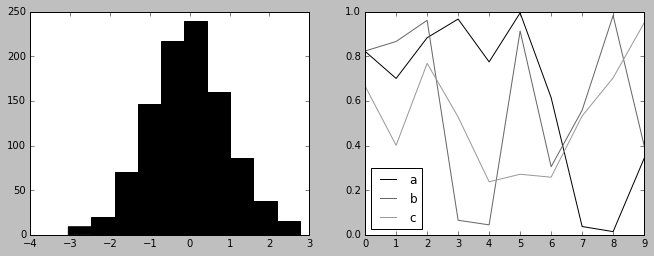

In [16]:
with plt.style.context('grayscale'):
    hist_and_lines()

### Seaborn style

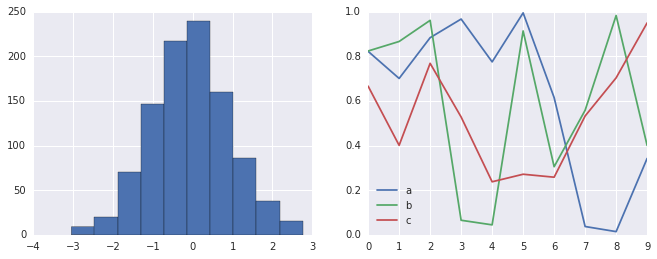

In [17]:
import seaborn
hist_and_lines()

<!--NAVIGATION-->
< [Customizing Ticks](04.10-Customizing-Ticks.ipynb) | [Contents](Index.ipynb) | [Three-Dimensional Plotting in Matplotlib](04.12-Three-Dimensional-Plotting.ipynb) >